# Bài 2
Xây dựng mô hình cho bài toán phân lớp dữ liệu (ảnh/văn bản)
- Đánh giá mô hình phân lớp
- Xây dựng mô hình phân lớp
- Thực hành

## 1.Đánh giá mô hình - Độ đo

- Kết quả của 1 mô hình phân loại có 4 khả năng
 - True positive: TP
 - True negative: TN
 - False positive: FP
 - False negative: FN





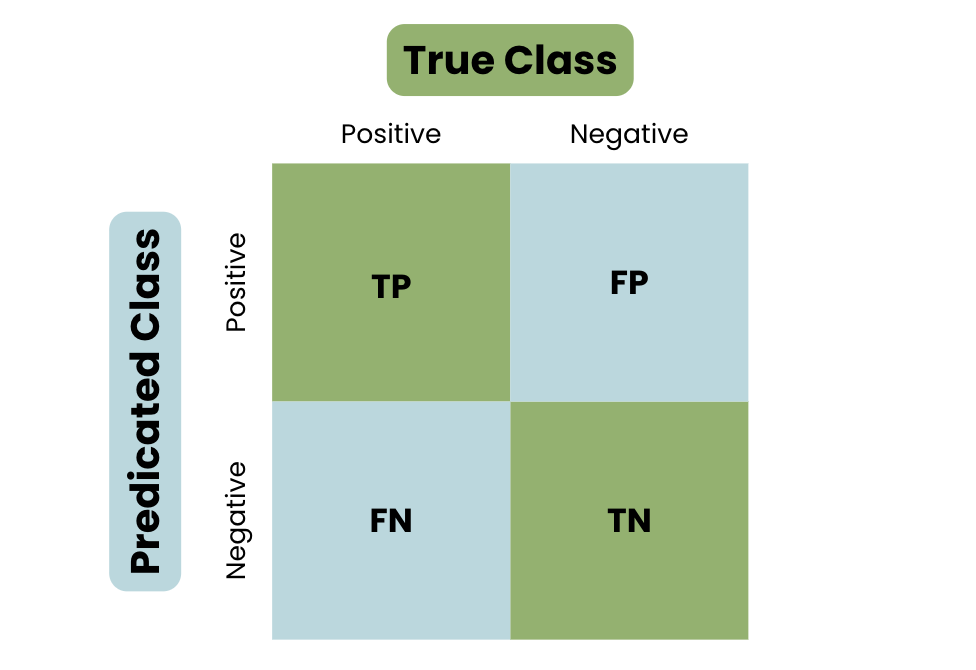

### 1.1.Accuracy
- Tổng các mẫu dự đoán đúng / Tổng các mẫu dự đoán
- Ví dụ: Tổng 100 mẫu:
    + TP: 40
    + TN: 20
    + FP: 30
    + FN: 10
    + => acc = (TP + TN)/(TP + TN + FP + FN) = (40 + 20)/100 = 0.6

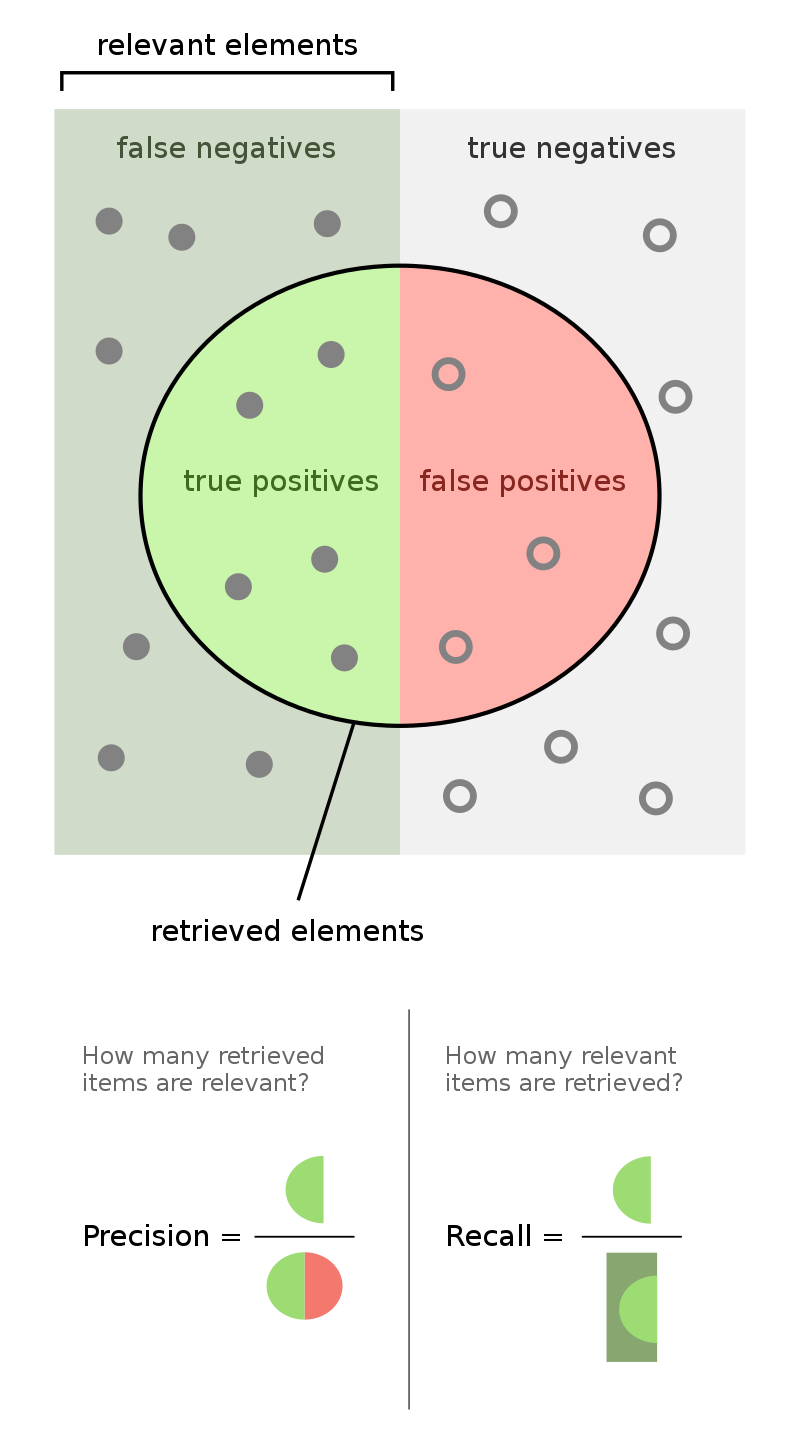

### 1.2.Precision
- Số mẫu thuộc dự đoán đúng của lớp đó trên tổng số dự đoán của lớp đó
- P = TP / (TP + FP)
- Vd: Tổng 100 mẫu phân lớp mèo (và không phải mèo):
    + TP: 40 (dự đoán mèo và đúng)
    + TN: 20 (dự đoán không phải mèo và đúng)
    + FP: 30 (dự đoán mèo và sai)
    + FN: 10 (dự đoán không phải mèo và sai)
    + => P = 40/(40+30) = 4/7
- Mục đích của precision: Định lượng khả năng dự đoán đúng của mô hình, khi nó xác định mẫu đó là đúng.

### 1.3.Recall
- Số mẫu thuộc dự đoán đúng của lớp đó trên tổng mẫu của lớp đó
- R = TP / (TP + FN)
- Vd: Tổng 100 mẫu phân lớp mèo (và không phải mèo):
    + TP: 40 (dự đoán mèo và đúng)
    + TN: 20 (dự đoán không phải mèo và đúng)
    + FP: 30 (dự đoán mèo và sai)
    + FN: 10 (dự đoán không phải mèo và sai)
    + => R = 40/(40+10) = 4/5
- Mục đích của precision: Định lượng độ phủ của mô hình trên lớp đúng.

### 1.4.F1-score:
- Trung bình điểu hòa:
+ Mục đích: cân bằng lại 2 độ đo P và R. Nếu P và R đều cao thì mô hình đạt kết quả tốt nhất.
+ F1 = 2PR/(P+R)

### 1.5.Trả lời câu hỏi

 - Khi nào thì sử dụng các độ đo nào (tương ứng với các dữ liệu như thế nào)
+ Precision: Khi mình quan tâm đến tỷ lệ của các dự đoán dương tích cực (positive predictions) mà thực sự là đúng so với tỷ lệ dự đoán dương tích cực mà không chắc chắn.
+ Recall: Dùng khi mình muốn mô hình trách bỏ sót Positve.
+ F1-Score: Điều hòa của Precision và Recall. Khi mình muốn cả 2 đều có độ chính xác cao.
+ Accuracy: Khi chỉ quan tâm đến tỷ lệ tổng thể của các dự đoán đúng so với tổng số lượng dự đoán.

## 2.Xây dựng mô hình

### 2.1.Dữ liệu
- Dữ liệu dạng gì
- Số chiều dữ liệu
- Phân hóa các lớp trong dữ liệu
- Phân chia: train, test, val
- Thiết lập dataloader cho dữ liệu

### 2.2.Xây dựng mô hình
- Kiến trúc mô hình
    + Input
    + Output
    + Số lượng layer, block
- Hàm mục tiêu, hàm tối ưu
- Thiết lập siêu tham số
    + Learning rate
    + Epoch, iteration
    + ...


### 2.3.Huấn luyện và kiểm thử mô hình
- Huấn luyện mô hình:
    + Thiết lập lưu trữ mô hình
    + Lựa chọn mô hình lưu trữ
- Kiểm thử mô hình:
    + Kiểm tra kết quả huấn luyện
    + Kiểm thử với dữ liệu kiểm thử và lựa chọn mô hình.

# 3. Bài tập thực hành
- Thực hiện với framework pytorch
- Sử dụng các dữ liệu được cung cấp sẵn, xây dựng mô hình phân loại và kiểm thử
- Bài làm nên có đầy đủ các mục đã được liệt kê

## 3.1. MNIST
- Sử dụng dữ liệu MNIST (torchvision.datasets.MNIST)
- Chia thành các tập: train, val, test với tỉ lệ phù hợp
- Chọn độ đo đánh giá phù hợp
- Xây dựng 1 class NN_MNIST
    + Chỉ sử dụng layer FC
    + Lựa chọn activation phù hợp
    + Lựa chọn hàm loss, optimizer phù hợp
    + Tiến hành cài đặt các siêu tham số
- Xây dựng các hàm để huấn luyện mô hình
- Xây dựng hàm để kiểm thử mô hình
- Kết quả kiểm thử mô hình, nhận xét kết quả


In [ ]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import transforms

#Dataload

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Split dataset into train, validation, and test sets
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_data, val_data = random_split(train_dataset, [train_size, val_size])

# Define data loaders
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

#NN_MNIST class

In [ ]:
class NN_MNIST(nn.Module):
    def __init__(self):
        super(NN_MNIST, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 784)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = NN_MNIST()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
def train(model, train_loader, optimizer, criterion):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    return running_loss / len(train_loader)

In [ ]:
def validate(model, val_loader, criterion):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_loss = running_loss / len(val_loader)
    val_accuracy = correct / total
    return val_loss, val_accuracy

In [ ]:
def evaluate(model, dataloader):
    model.eval()
    correct = 0
    total = 0
    tp = 0  # True positives
    fp = 0  # False positives
    fn = 0  # False negatives
    with torch.no_grad():
        for inputs, labels in dataloader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            tp += ((predicted == labels) & (labels == 1)).sum().item()
            fp += ((predicted == 1) & (labels == 0)).sum().item()
            fn += ((predicted == 0) & (labels == 1)).sum().item()

    accuracy = correct / total
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

    return accuracy, precision, recall, f1_score

In [ ]:
num_epochs = 25
for epoch in range(num_epochs):
    train_loss = train(model, train_loader, optimizer, criterion)
    val_loss, val_accuracy = validate(model, val_loader, criterion)
    val_accuracy, val_precision, val_recall, val_f1_score = evaluate(model, val_loader)
    print(f"Validation Metrics: Accuracy={val_accuracy:.4f}, Precision={val_precision:.4f}, Recall={val_recall:.4f}, F1-score={val_f1_score:.4f}")
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")


Validation Metrics: Accuracy=0.9150, Precision=1.0000, Recall=1.0000, F1-score=1.0000
Epoch 1/25, Train Loss: 0.4427, Val Loss: 0.2878, Val Accuracy: 0.9150
Validation Metrics: Accuracy=0.9387, Precision=1.0000, Recall=1.0000, F1-score=1.0000
Epoch 2/25, Train Loss: 0.2138, Val Loss: 0.1960, Val Accuracy: 0.9387
Validation Metrics: Accuracy=0.9544, Precision=1.0000, Recall=1.0000, F1-score=1.0000
Epoch 3/25, Train Loss: 0.1517, Val Loss: 0.1505, Val Accuracy: 0.9544
Validation Metrics: Accuracy=0.9600, Precision=1.0000, Recall=1.0000, F1-score=1.0000
Epoch 4/25, Train Loss: 0.1230, Val Loss: 0.1439, Val Accuracy: 0.9600
Validation Metrics: Accuracy=0.9562, Precision=0.9992, Recall=1.0000, F1-score=0.9996
Epoch 5/25, Train Loss: 0.1017, Val Loss: 0.1464, Val Accuracy: 0.9562
Validation Metrics: Accuracy=0.9690, Precision=1.0000, Recall=1.0000, F1-score=1.0000
Epoch 6/25, Train Loss: 0.0895, Val Loss: 0.1097, Val Accuracy: 0.9690
Validation Metrics: Accuracy=0.9599, Precision=1.0000, Rec

In [ ]:
# Evaluate on validation set
val_accuracy, val_precision, val_recall, val_f1_score = evaluate(model, val_loader)
print(f"Validation Metrics: Accuracy={val_accuracy:.4f}, Precision={val_precision:.4f}, Recall={val_recall:.4f}, F1-score={val_f1_score:.4f}")

# Evaluate on test set
test_accuracy, test_precision, test_recall, test_f1_score = evaluate(model, test_loader)
print(f"Test Metrics: Accuracy={test_accuracy:.4f}, Precision={test_precision:.4f}, Recall={test_recall:.4f}, F1-score={test_f1_score:.4f}")

Validation Metrics: Accuracy=0.9722, Precision=1.0000, Recall=1.0000, F1-score=1.0000
Test Metrics: Accuracy=0.9747, Precision=1.0000, Recall=1.0000, F1-score=1.0000


# Nhận xét


Accuracy: Mức độ chính xác của mô hình đạt mức cao, dao động từ khoảng 91.5% đến 97.4% trên tập validation. Điều này cho thấy mô hình có khả năng phân loại dữ liệu một cách chính xác và hiệu quả.

Precision: Precision của mô hình đều đạt giá trị 1.0000 trên tất cả các epoch, tức là mô hình không có bất kỳ dự đoán sai tích cực nào (false positive). Điều này cho thấy mô hình rất chính xác khi dự đoán các trường hợp tích cực.

Recall: Tương tự như precision, recall cũng đạt giá trị 1.0000 trên tất cả các epoch, tức là mô hình không bỏ sót bất kỳ trường hợp tích cực nào (false negative). Điều này cho thấy mô hình có khả năng phát hiện và bao phủ tất cả các trường hợp tích cực.

F1-score: F1-score của mô hình cũng đạt giá trị tối đa là 1.0000 trên tất cả các epoch. Điều này chỉ ra rằng mô hình có sự cân bằng tốt giữa precision và recall.

=> mô hình đã đạt được kết quả rất tốt trên tập validation, với mức độ chính xác cao và không có dự đoán sai tích cực hoặc bỏ sót trường hợp tích cực nào. Điều này cho thấy mô hình làm việc hiệu quả.

## 3.2. Adult
- Sử dụng dữ liệu Adult (archive.ics.uci.edu/dataset/2/adult)
- Chia thành các tập: train, val, test với tỉ lệ phù hợp
- Chọn độ đo đánh giá phù hợp
- Xây dựng 1 class NN_Adult
    + Chỉ sử dụng layer FC
    + Lựa chọn activation phù hợp
    + Lựa chọn hàm loss, optimizer phù hợp
    + Tiến hành cài đặt các siêu tham số
- Xây dựng các hàm để huấn luyện mô hình
- Xây dựng hàm để kiểm thử mô hình
- Kết quả kiểm thử mô hình, nhận xét kết quả

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Load data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
names = ['age', 'workclass', 'fin_weight', 'education', 'education_num', 'marital_status',
         'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
         'hours_per_week', 'native_country', 'income']
data = pd.read_csv(url, names=names, na_values=' ?', skipinitialspace=True)


In [ ]:
data.head()

,age,workclass,fin_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fin_weight      32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
# Encode categorical features
cat_cols = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']
label_encoders = {}
for col in cat_cols:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

# Normalize numerical features
num_cols = ['age', 'fin_weight', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

# Split data into features and target
X = data.drop('income', axis=1)
y = data['income']

In [ ]:
data.head()

,age,workclass,fin_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.030671,7,-1.063611,9,1.134739,4,1,1,4,1,0.148453,-0.21666,-0.035429,39,0
1,0.837109,6,-1.008707,9,1.134739,2,4,0,4,1,-0.145920,-0.21666,-2.222153,39,0
2,-0.042642,4,0.245079,11,-0.420060,0,6,1,4,1,-0.145920,-0.21666,-0.035429,39,0
3,1.057047,4,0.425801,1,-1.197459,2,6,0,2,1,-0.145920,-0.21666,-0.035429,39,0
4,-0.775768,4,1.408176,9,1.134739,2,10,5,2,0,-0.145920,-0.21666,-0.035429,5,0


In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.int64)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.int64)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.int64)

# Create DataLoader
train_data = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_data = TensorDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(val_data, batch_size=64, shuffle=False)

In [ ]:
# Define neural network model
class NN_Adult(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NN_Adult, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Initialize the model
input_size = X_train.shape[1]
hidden_size = 64
num_classes = len(label_encoders['income'].classes_)
model = NN_Adult(input_size, hidden_size, num_classes)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:
# Training function
def train(model, train_loader, optimizer, criterion):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    return running_loss / len(train_loader)

# Validation function
def validate(model, val_loader, criterion):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_loss = running_loss / len(val_loader)
    val_accuracy = correct / total
    return val_loss, val_accuracy


In [ ]:

# Training loop
num_epochs = 25
for epoch in range(num_epochs):
    train_loss = train(model, train_loader, optimizer, criterion)
    val_loss, val_accuracy = validate(model, val_loader, criterion)
    val_accuracy, val_precision, val_recall, val_f1_score = evaluate(model, val_loader)
    print(f"Validation Metrics:Loss = {val_loss:.4f} Accuracy={val_accuracy:.4f}, Precision={val_precision:.4f}, Recall={val_recall:.4f}, F1-score={val_f1_score:.4f}")


Validation Metrics:Loss = 0.3740 Accuracy=0.8322, Precision=0.8085, Recall=0.3781, F1-score=0.5153
Validation Metrics:Loss = 0.3541 Accuracy=0.8400, Precision=0.6943, Recall=0.5750, F1-score=0.6291
Validation Metrics:Loss = 0.3343 Accuracy=0.8462, Precision=0.7192, Recall=0.5708, F1-score=0.6365
Validation Metrics:Loss = 0.3735 Accuracy=0.8310, Precision=0.8977, Recall=0.3198, F1-score=0.4716
Validation Metrics:Loss = 0.3249 Accuracy=0.8521, Precision=0.7712, Recall=0.5302, F1-score=0.6284
Validation Metrics:Loss = 0.3212 Accuracy=0.8516, Precision=0.7342, Recall=0.5813, F1-score=0.6488
Validation Metrics:Loss = 0.3226 Accuracy=0.8499, Precision=0.7518, Recall=0.5427, F1-score=0.6304
Validation Metrics:Loss = 0.3263 Accuracy=0.8484, Precision=0.6858, Recall=0.6594, F1-score=0.6723
Validation Metrics:Loss = 0.3313 Accuracy=0.8445, Precision=0.6583, Recall=0.7083, F1-score=0.6824
Validation Metrics:Loss = 0.3323 Accuracy=0.8482, Precision=0.8098, Recall=0.4656, F1-score=0.5913
Validation

In [ ]:
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.int64)
test_data = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)


val_accuracy, val_precision, val_recall, val_f1_score = evaluate(model, val_loader)
print(f"Validation Metrics: Accuracy={val_accuracy:.4f}, Precision={val_precision:.4f}, Recall={val_recall:.4f}, F1-score={val_f1_score:.4f}")

# Evaluate on test set
test_accuracy, test_precision, test_recall, test_f1_score = evaluate(model, test_loader)
print(f"Test Metrics: Accuracy={test_accuracy:.4f}, Precision={test_precision:.4f}, Recall={test_recall:.4f}, F1-score={test_f1_score:.4f}")

Validation Metrics: Accuracy=0.8514, Precision=0.7504, Recall=0.5542, F1-score=0.6375
Test Metrics: Accuracy=0.8494, Precision=0.7521, Recall=0.5460, F1-score=0.6327


# Nhận xét


Nhận xét:
- Mô hình đạt được mức độ chính xác trên tập validation là khoảng  83-85%, tức là có khả năng phân loại dữ liệu một cách hiệu quả.
- Precision là 65-80%, không đều qua các epoch. Điều này chỉ ra rằng mô hình có thể không ổn định và cần được cải thiện để đảm bảo tính đồng nhất của dự đoán. Các biến động này có thể gây khó khăn trong việc đưa ra dự đoán chính xác và đáng tin cậy trên dữ liệu mới.
- Recall đạt 37-73%, điều này cũng chỉ ra một sự không ổn định trong hiệu suất của mô hình qua các epoch. Recall thấp có thể chỉ ra rằng mô hình đã bỏ sót một số lớp dữ liệu tích cực, dẫn đến việc không nhận diện chính xác các trường hợp quan trọng
- F1-score là 47-68%,cho thấy một mức độ trung bình đến khá trong việc kết hợp cả precision và recall. Vì với các giá trị precision và recall thấp như vậy, F1-score cũng không đạt được sự ổn định cao